# An Empirical Comparison of Supervised and Self-Supervised Learning

In [1]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

In [2]:
%load_ext autoreload
%autoreload 2

## Baseline: convolutional neural network

In [3]:
conv_args = TrainArgs(batchsize = 10)

In [4]:
ConvNet, conv_losses = train_ConvNet(conv_args)

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.303
[epoch: 0, i:   999] avg mini-batch loss: 2.302
[epoch: 0, i:  1499] avg mini-batch loss: 2.300
[epoch: 0, i:  1999] avg mini-batch loss: 2.297
[epoch: 0, i:  2499] avg mini-batch loss: 2.284
[epoch: 0, i:  2999] avg mini-batch loss: 2.250
[epoch: 0, i:  3499] avg mini-batch loss: 2.191
[epoch: 0, i:  3999] avg mini-batch loss: 2.138
[epoch: 0, i:  4499] avg mini-batch loss: 2.113
[epoch: 0, i:  4999] avg mini-batch loss: 2.058
[epoch: 1, i:   499] avg mini-batch loss: 2.026
[epoch: 1, i:   999] avg mini-batch loss: 1.977
[epoch: 1, i:  1499] avg mini-batch loss: 1.923
[epoch: 1, i:  1999] avg mini-batch loss: 1.887
[epoch: 1, i:  2499] avg mini-batch loss: 1.891
[epoch: 1, i:  2999] avg mini-batch loss: 1.830
[epoch: 1, i:  3499] avg mini-batch loss: 1.800
[epoch: 1, i:  3999] avg mini-batch loss: 1.733
[epoch: 1, i:  4499] avg mini-batch loss: 1.686
[epoch: 1, i:  4999] avg mini-batc

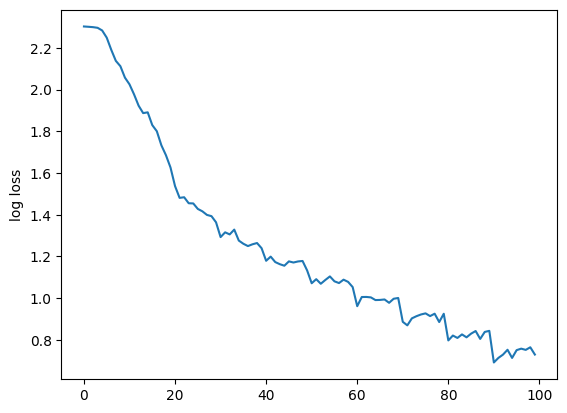

In [5]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [6]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Baseline accuracy of the convolutional model is 63.11 %


## Momentum Contrast

### Pre-Training the Encoder

In [7]:
encoder_args = TrainArgs(epochs = 30)

In [8]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.033438
Train Epoch: 2 	Loss: 0.012113
Train Epoch: 3 	Loss: 0.006579
Train Epoch: 4 	Loss: 0.004590
Train Epoch: 5 	Loss: 0.003827
Train Epoch: 6 	Loss: 0.003313
Train Epoch: 7 	Loss: 0.003006
Train Epoch: 8 	Loss: 0.002820
Train Epoch: 9 	Loss: 0.002639
Train Epoch: 10 	Loss: 0.002439
Train Epoch: 11 	Loss: 0.002358
Train Epoch: 12 	Loss: 0.002216
Train Epoch: 13 	Loss: 0.002143
Train Epoch: 14 	Loss: 0.002036
Train Epoch: 15 	Loss: 0.002010
Train Epoch: 16 	Loss: 0.001920
Train Epoch: 17 	Loss: 0.001839
Train Epoch: 18 	Loss: 0.001796
Train Epoch: 19 	Loss: 0.001756
Train Epoch: 20 	Loss: 0.001694
Train Epoch: 21 	Loss: 0.001629
Train Epoch: 22 	Loss: 0.001602
Train Epoch: 23 	Loss: 0.001541
Train Epoch: 24 	Loss: 0.001511
Train Epoch: 25 	Loss: 0.001480
Train Epoch: 26 	Loss: 0.001450
Train Epoch: 27 	Loss: 0.001419
Train Epoch: 28 	Loss: 0.001415
Train Epoch: 29 	Loss: 0.001365
Train

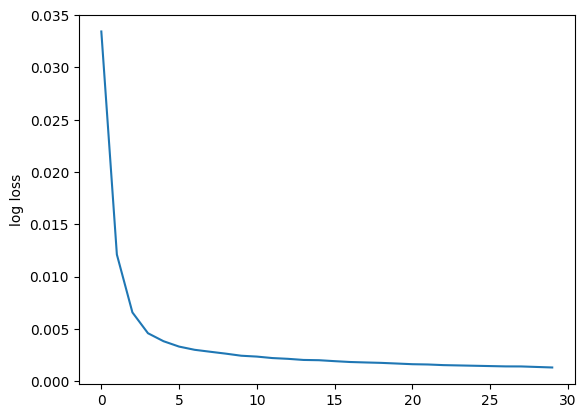

In [9]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [10]:
data, targets = encode_data()

Files already downloaded and verified


100%|██████████| 10000/10000 [01:38<00:00, 101.73it/s]


In [11]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified


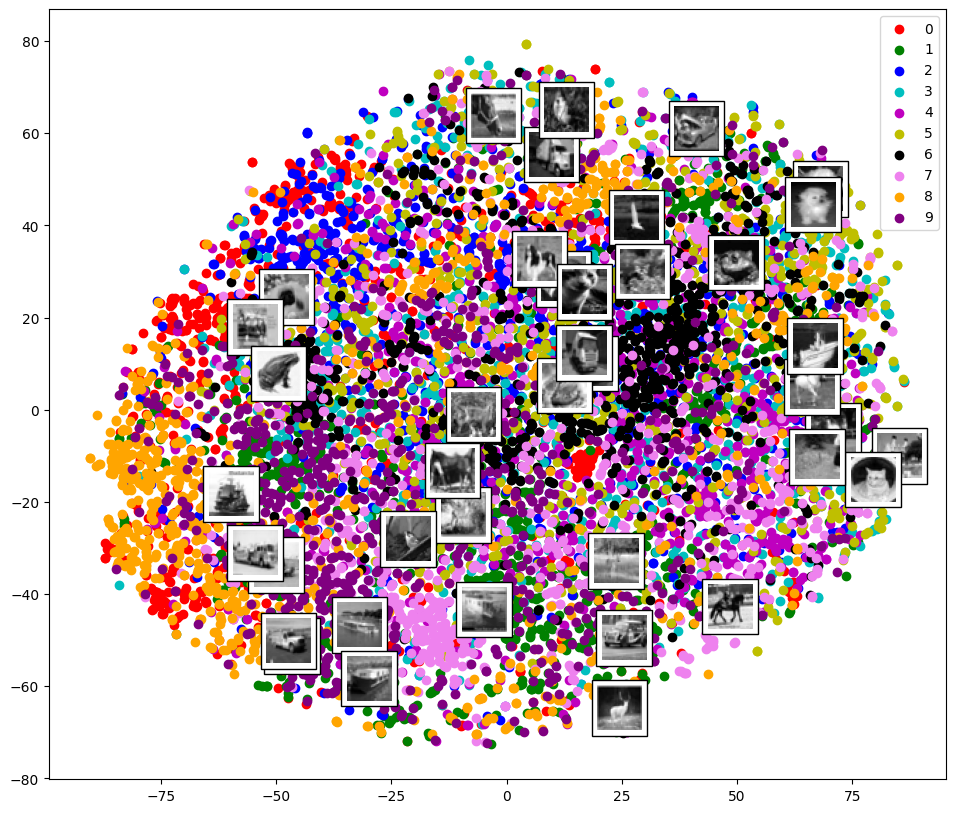

In [12]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [13]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified


100%|██████████| 50000/50000 [08:19<00:00, 100.00it/s]


Files already downloaded and verified


100%|██████████| 10000/10000 [01:40<00:00, 99.41it/s]


In [14]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [15]:
svm.score(X_test, y_test)

0.6497

### Multiple Runs

In [16]:
# subsample so things run faster
X_train, y_train = encode_data(train=True, subsample = True)
X_test, y_test = encode_data(train=False, subsample = True)

Files already downloaded and verified


100%|██████████| 5000/5000 [00:50<00:00, 98.47it/s] 


Files already downloaded and verified


100%|██████████| 1000/1000 [00:10<00:00, 99.30it/s]


In [17]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [18]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=True)
    conv_errors.append(test_conv(ConvNet, subsample=True)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 1, i:   499] avg mini-batch loss: 2.285
[epoch: 2, i:   499] avg mini-batch loss: 2.197
[epoch: 3, i:   499] avg mini-batch loss: 2.063
[epoch: 4, i:   499] avg mini-batch loss: 1.964
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.301
[epoch: 2, i:   499] avg mini-batch loss: 2.300
[epoch: 3, i:   499] avg mini-batch loss: 2.295
[epoch: 4, i:   499] avg mini-batch loss: 2.282
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.298
[epoch: 2, i:   499] avg mini-batch loss: 2.287
[epoch: 3, i:   499] avg mini-batch loss: 2.230
[epoch: 4, i:   499] avg mini-batch loss: 2.132
Files already downloaded and verified


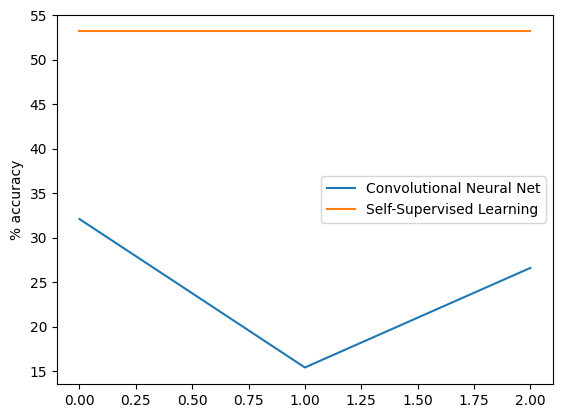

In [19]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [20]:
conv_errors

[32.1, 15.4, 26.6]

In [21]:
svm_errors

[0.532, 0.532, 0.532]

In [22]:
conv_errors

[32.1, 15.4, 26.6]